In [1]:
#We have to prepare a classification model using Naive Bayes.

In [4]:
import pandas as pd
import numpy as np

In [10]:
test_tmp=pd.read_csv("SalaryData_test.csv")

In [11]:
test_tmp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [14]:
train_tmp=pd.read_csv("SalaryData_Train.csv.crdownload")

In [16]:
train_tmp

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6484,61,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Sales,Husband,Black,Male,0,0,60,United-States,>50K
6485,58,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K
6486,51,Private,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,1564,43,United-States,>50K
6487,49,Private,Some-college,10,Divorced,Sales,Unmarried,White,Female,0,0,55,England,<=50K


In [17]:
df_tmp=test_tmp.append(train_tmp)

In [18]:
test=test_tmp.copy()
train=train_tmp.copy()

In [19]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [21]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [23]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [24]:
number = LabelEncoder()

In [25]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [26]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,36,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,36,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,36,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,36,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [27]:
mapping = {' >50K': 1, ' <=50K': 2}

In [28]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [29]:
df = train.append(test) 
df1 = df.copy()
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,36,2.0
1,50,4,9,13,2,3,0,4,1,0,0,13,36,2.0
2,38,2,11,9,0,5,1,4,1,0,0,40,36,2.0
3,53,2,1,7,2,5,0,2,1,0,0,40,36,2.0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2.0


In [30]:
df1.shape

(21549, 14)

In [32]:
df1.describe

<bound method NDFrame.describe of        age  workclass  education  educationno  maritalstatus  occupation  \
0       39          5          9           13              4           0   
1       50          4          9           13              2           3   
2       38          2         11            9              0           5   
3       53          2          1            7              2           5   
4       28          2          9           13              2           9   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitall

In [33]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           1
dtype: int64

In [34]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,36,2.0
1,50,4,9,13,2,3,0,4,1,0,0,13,36,2.0
2,38,2,11,9,0,5,1,4,1,0,0,40,36,2.0
3,53,2,1,7,2,5,0,2,1,0,0,40,36,2.0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,2.0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,2.0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,2.0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,2.0


In [47]:
np.where(df1['Salary'].isnull())

(array([6488], dtype=int64),)

In [61]:
df2=df1.fillna(method='pad')

In [62]:
df2.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [53]:
#finding correlation

In [63]:
corr=df2.corr()

<AxesSubplot:>

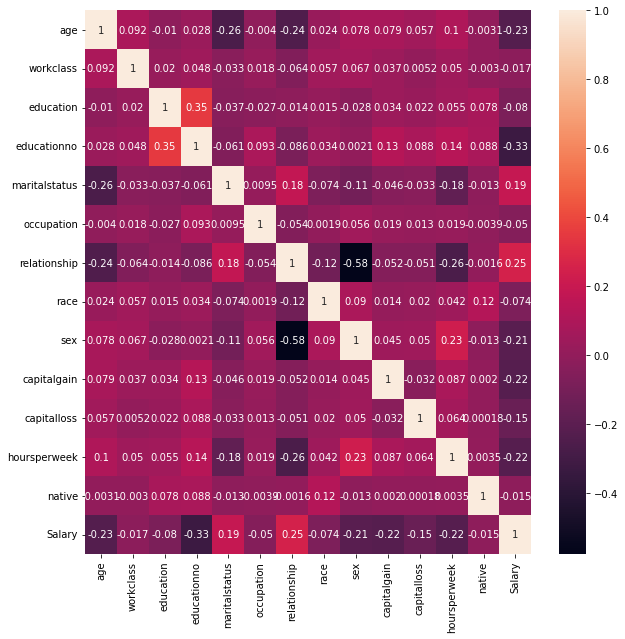

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Naive Bayes

In [65]:
x_train = train.iloc[:,0:13]
y_train = train.iloc[:,13]
x_test = test.iloc[:,0:13]
y_test = test.iloc[:,13]

In [72]:
clsfrgnb = GaussianNB()
clsfrgnb.fit(x_train, y_train1)

GaussianNB()

In [68]:
y_train

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
6484    1.0
6485    1.0
6486    1.0
6487    2.0
6488    NaN
Name: Salary, Length: 6489, dtype: float64

In [69]:
y_train.isnull().sum()

1

In [70]:
y_train1=y_train.fillna(method='pad')

In [71]:
y_train1.isnull().sum()

0

In [73]:
y_pred_gnb = clsfrgnb.predict(x_test)
confusion_matrix(y_test, y_pred_gnb)

array([[ 1248,  2452],
       [  556, 10804]], dtype=int64)

In [74]:
pd.crosstab(y_test.values.flatten(),clsfrgnb)


col_0,GaussianNB()
row_0,
1,3700
2,11360


In [75]:
print ("Accuracy",np.mean(y_pred_gnb==y_test.values.flatten()))

Accuracy 0.800265604249668


In [76]:
clsfrmnb = MultinomialNB()
clsfrmnb.fit(x_train, y_train1)

MultinomialNB()

In [77]:
y_pred_mnb = clsfrmnb.predict(x_test)
confusion_matrix(y_test, y_pred_mnb)

array([[  780,  2920],
       [  469, 10891]], dtype=int64)

In [78]:
pd.crosstab(y_test.values.flatten(),clsfrmnb)

col_0,MultinomialNB()
row_0,
1,3700
2,11360


In [79]:
print ("Accuracy",np.mean(y_pred_mnb==y_test.values.flatten()))


Accuracy 0.7749667994687915


In [ ]:
# We observe that GaussianNB model has better accuracy.